### api

#### 安装torch
1. 检查cuda版本: NVIDIA-smi
2. 使用uv pip安装: `uv pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126`

In [50]:
import numpy as np
import torch
import torch.nn as nn
if torch.cuda.is_available():
    torch.set_default_device('cuda')
else:
    torch.set_default_device('cpu')

x = torch.randn(3, 3)
print(x.device)  # 如果有 GPU，则输出 `cuda:0`

cuda:0


#### matrix multiplication

In [51]:
def matmul(a, b):
    return np.dot(a, b)

# 使用torch
a = torch.randn(3, 4)
b = torch.randn(4, 2)
c = a @ b

#### matrix addition

In [52]:
def matadd(a, b):
    return a + b

# 使用torch
a = torch.randn(3, 4)
b = torch.randn(3, 4)
c = a + b

#### matrix transpose

In [53]:
def transpose(a):
    return a.T

# useage
transpose(np.array([[1, 2], [3, 4]]))

# 或者使用torch
a = torch.randn(3, 4)
a_t = a.t()           # 转置为 4x3
# 或交互两个维度
a = torch.randn(2, 3, 4)
a_t = torch.transpose(a, 1, 2)  # 交换第1和第2维度, 输出为 2x4x3, 第一个维度可以看作是batch_size, 没有变

# 使用permute, permute可以一次性交换多个维度
a = torch.randn(2, 3, 4)
a_t = a.permute(0, 2, 1)  # 交换第1和第2维度, 输出为 2x4x3, 第一个维度可以看作是batch_size, 没有变
torch.equal(a_t, torch.transpose(a, 1, 2))

True

#### matrix reshape

In [54]:
a = torch.randn(6, 2)
b = a.reshape(3, 4)     # 重塑为 3x4
# 或使用 view (需连续)
b = a.view(3, 4)

#### matrix initialization

In [55]:
def init_matrix(shape):
    return np.random.randn(*shape)

# useage
init_matrix((2, 2))


# 使用torch
zeros = torch.zeros(3, 4)       # 全零矩阵
ones = torch.ones(3, 4)         # 全一矩阵
rand_matrix = torch.rand(3, 4)  # 均匀分布 [0,1)
randn_matrix = torch.randn(3, 4)# 标准正态分布


#### calc sin and cos

In [56]:
import torch

# 创建一个张量
x = torch.tensor([0.0, torch.pi / 2, torch.pi])
print(x)

# 计算正弦值
sin_x = torch.sin(x)
print("sin(x):", sin_x)

# 计算余弦值
cos_x = torch.cos(x)
print("cos(x):", cos_x)


tensor([0.0000, 1.5708, 3.1416], device='cuda:0')
sin(x): tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08], device='cuda:0')
cos(x): tensor([ 1.0000e+00, -4.3711e-08, -1.0000e+00], device='cuda:0')


#### word tokenization(tiktoken)

In [57]:
import tiktoken

data = "a"

encoding = tiktoken.get_encoding("cl100k_base")
tokenized_text = encoding.encode(data)
max_token_value = max(tokenized_text) + 1
print(max_token_value)
tokenized_text = torch.tensor(tokenized_text, dtype=torch.long)
tokenized_text

65


tensor([64], device='cuda:0')

#### get random index in words

In [58]:
data = "hello world! Test data for tokenization."
tokenized_text = encoding.encode(data)
# tokenize后, 我们可以使用torch.tensor将其转换为张量
tokenized_text = torch.tensor(tokenized_text, dtype=torch.long)
print(tokenized_text)

batch_size = 2
context_length = 3

# 生成一个随机的下标, 注意这里size是元组, 代表我们每个批次选一个开始下标
idxs = torch.randint(low=0, high=len(tokenized_text) - context_length, size=(batch_size,))

# 这样就可以继续从tokenized_texta中取出对应批次的数据, x_batch是输入, y_batch是预期输出
x_batch = torch.stack([tokenized_text[idx:idx + context_length] for idx in idxs])
y_batch = torch.stack([tokenized_text[idx + 1:idx + context_length + 1] for idx in idxs])
print(x_batch.shape, x_batch.shape)

tensor([15339,  1917,     0,  3475,   828,   369,  4037,  2065,    13],
       device='cuda:0')
torch.Size([2, 3]) torch.Size([2, 3])


#### apply matrix mask

tensor([[0.4496, 0.0780, 0.1184, 0.3280],
        [0.2820, 0.1881, 0.1188, 0.3170],
        [0.9326, 0.5730, 0.3664, 0.1999]], device='cuda:0')


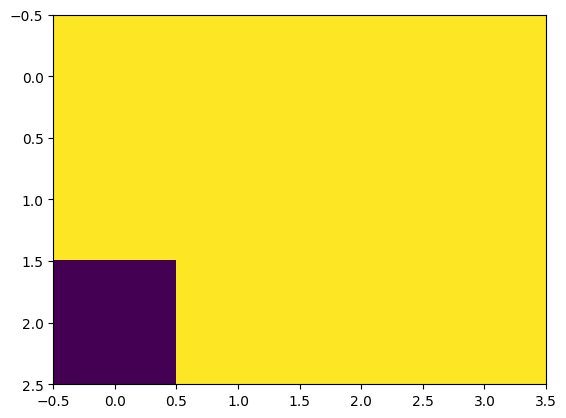

In [59]:
a = torch.rand(3, 4)
print(a)

mask = (a > 0.9)          # 生成布尔掩码
masked_b = a.masked_fill(mask, -1e9)  # 将正值替换为 -1e9

# 可视化
import matplotlib.pyplot as plt
plt.imshow(masked_b.cpu().numpy())
plt.show()

In [60]:
# 如果和矩阵的一部分mask为具体的值
a = torch.rand(3, 4)
print(a)

# 生成一个上三角矩阵. diagonal为0, 代表包含对角线
mask = torch.triu(torch.ones_like(a, dtype=torch.bool), diagonal=1)
# mask = torch.triu(torch.ones(a.shape[0], a.shape[1], dtype=torch.bool), diagonal=1)
print(mask)

# a矩阵中mask为True的部分替换为-1e9
masked_a = a.masked_fill(mask, value=-1e9)
print(masked_a)

tensor([[0.3163, 0.9202, 0.6243, 0.6699],
        [0.5641, 0.3972, 0.6005, 0.3296],
        [0.2281, 0.3202, 0.3345, 0.2969]], device='cuda:0')
tensor([[False,  True,  True,  True],
        [False, False,  True,  True],
        [False, False, False,  True]], device='cuda:0')
tensor([[ 3.1629e-01, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [ 5.6409e-01,  3.9724e-01, -1.0000e+09, -1.0000e+09],
        [ 2.2814e-01,  3.2016e-01,  3.3451e-01, -1.0000e+09]], device='cuda:0')


#### calc softmax

In [61]:
logits = torch.randn(3, 4)
print(logits)
softmax = torch.nn.functional.softmax(logits, dim=-1)  # 沿最后一维计算(每一行)
print(softmax)
sum(softmax[0])

tensor([[ 1.8580,  1.2356, -0.5407, -0.4103],
        [-1.4469,  1.3955,  0.8138, -0.1618],
        [ 0.1205,  0.6529,  1.5561, -0.3242]], device='cuda:0')
tensor([[0.5777, 0.3100, 0.0525, 0.0598],
        [0.0319, 0.5471, 0.3058, 0.1153],
        [0.1325, 0.2257, 0.5568, 0.0849]], device='cuda:0')


tensor(1., device='cuda:0')

#### calc sqrt root

In [62]:
import math
math.sqrt(4)

2.0

#### apply layer normalization

In [ ]:
layer_norm = nn.LayerNorm(2)
# 把前面的输出作为输入, 调用layer_norm
# layer_norm(output)

#### create feed forward network

In [ ]:
class FeedForward(nn.Module):
    def __init__(self):
        super().__init__()
        # 维度
        self.d_model = d_model
        # 丢失率
        self.dropout = dropout
        # 两个线性层, 先从d_model映射到d_model*4, 再从d_model*4映射到d_model, 中间有ReLU激活函数, 最后有dropout
        self.ffn = nn.Sequential(
            nn.Linear(in_features=self.d_model, out_features=self.d_model * 4),
            nn.ReLU(),
            nn.Linear(in_features=self.d_model * 4, out_features=self.d_model),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.ffn(x)

#### calc cross entropy

交叉熵损失函数`F.cross_entropy(input=logits, target=targets_reshaped)`期望输入的形状是 (N, C) 和 (N)，其中 N 是样本数量，C 是类别数量。
> 我的理解: 为什么target里不需要考虑C(类别数), 因为target代表的意思就是预期的类别, 而我们的输入里放了C个类别的概率. 所以输入的每个序列里的某一个元素, 都有一个预期的类别, 这样target其实就相当于降维了.

下面deepseek给了一个使用示例:

In [ ]:
import torch
from torch.nn import functional as F

# 假设我们有一个简单的分类任务
# 输入是一个 batch 的 logits，目标是对应的类别标签

# 定义 batch size (B), 类别数 (C), 序列长度 (T)
B = 2  # batch size
T = 3  # 序列长度(就是有几个词)
C = 5  # 类别数（词汇表大小）

# 随机生成 logits (模型的输出)
# logits 的形状是 (B, T, C)
logits = torch.randn(B, T, C)  # 随机生成 logits
print("Logits (原始形状):")
print(logits)
print("Logits 的形状:", logits.shape)

# 随机生成 targets (目标类别标签)
# targets 的形状是 (B, T)
targets = torch.randint(0, C, (B, T))  # 随机生成目标标签
print("\nTargets (原始形状):")
print(targets)
print("Targets 的形状:", targets.shape)

# 将 logits 和 targets 重塑为 (B * T, C) 和 (B * T)
logits_reshaped = logits.view(B * T, C)  # 重塑为 (B * T, C)
targets_reshaped = targets.view(B * T)   # 重塑为 (B * T)
print("\nReshaped Logits (形状):", logits_reshaped.shape)
print("Reshaped Targets (形状):", targets_reshaped.shape)

# 使用 F.cross_entropy 计算损失
loss = F.cross_entropy(logits_reshaped, targets_reshaped)
print("\n计算得到的损失值:", loss)


##### how to use loss

计算出loss后, 我们就直到了初测出来的值和目标值的差异的大小, 这个时候借助反向传播, 我们就可以调整我们的参数, 使得我们的预测值更加接近目标值.

涉及到的api:
1. `loss.backward()`: 反向传播, 计算梯度
2. `optimizer.step()`: optimizer会更新模型中的参数. 注意: 这个函数会更新所有的参数, 所以在调用这个函数之前, 我们需要先调用`optimizer.zero_grad()`清空梯度缓存.

### 其他

关于torch中contiguous的意思: https://stackoverflow.com/a/69599806/12855525
1. 其实就是tensor中的数据是不是连续存储的，有没有出现跳跃的情况
2. 如果tensor不是连续存储的，可以使用contiguous()方法来使其连续存储

方差(mean), 公式: 
$μ = \frac{1}{n}\sum_{i=1}^{n}x_i$  
标准差(standard deviation), 公式: 
$var = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$
$σ = \sqrt{var}$

layer normalization的一些几何解释: [Re-Introducing LayerNorm: Geometric Meaning, Irreversibility and a Comparative Study with RMSNorm](https://arxiv.org/html/2409.12951v1#S2)